<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" width=900 height=900 />


# Modelling Ratings Scores for Seattle AirBnB
Dataset from Kaggle: **Seattle Airbnb Open Data** by *AirBnB*  

Data sources includes:
* `calendar.csv`
* `listings.csv`
* `reviews.csv`

Source: https://www.kaggle.com/airbnb/seattle

Team Name: Send Me to Exchange

Team Members: Chee Jian Hui, Seah Jia Jie Jeff, Seah Jia Jun, Loh Zhi Han

Lab Group: MA05, Dr Duc Thinh Pham

# Note:
To run this notebook, you need the following modules that are not included in the default installation:
- langdetect: Language detection library ported from Google's language-detection 
- wordcloud: A little word cloud generator in Python

You will need to run the following commands:

- `conda install -c conda-forge langdetect`

- `conda install -c conda-forge wordcloud`

# Problem
AirBnB is a platform that allows hosts to rent their apartments to visitors. As AirBnB has a review and rating system, visitors have a tendency to select and stay in apartments with higher reviews and ratings as they tend to offer a better experience. Hence, it would be interesting to see the features which are critical for high ratings. 

#### Approach
Our approach will be looking at visitors' reviews and apply sentiment analysis to the dataset to understand more about users' experience. We will focus on superhosts in the listings dataset as well, who tend to have high ratings and low cancellation rates. Through this, we may be able to find some insights that may help visitors to select the best accommodation and help other hosts to provide visitors with a more pleasant experience.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.set_option('max_columns', None)

# Sentiment Analysis of Reviews

In [2]:
reviews = pd.read_csv('AirBnB/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [3]:
reviews.info() # some nans in comments, need check out for empty strings too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Cleaning Comments

In [4]:
# replaces newlines and tabs with spaces
reviews.comments = reviews.comments.str.replace(r'\n','').str.replace(r'\t','').str.replace(r'\r','')

# remove any symbols and punctuation, convert to lower case and strip excess space
reviews.comments = reviews.comments.str.replace(r"[.®'&$’/\"--()!*:?,]",'').str.lower().str.strip()
reviews

C:\Users\JIanHui\Anaconda3\lib\site-packages\pandas\core\strings.py:713: FutureWarning: Possible set difference at position 10
  compiled = re.compile(pat, flags=flags)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to everyt...
1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighbo...
3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,the description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,we had an excellent stay it was clean and comf...
84846,3624990,51511988,2015-10-20,19543701,Jaime,gran ubicación cerca de todo lo atractivo del ...
84847,3624990,52814482,2015-11-02,24445024,Jørgen,very good apartement clean and well sized situ...


There are some comments that are just empty strings and some NaNs in the comments. We will drop them.

In [5]:
reviews[reviews.comments == '']

,listing_id,id,date,reviewer_id,reviewer_name,comments
4300,3953365,23777971,2014-12-09,20938014,Will,
8863,7932696,46414097,2015-09-10,41768154,Tia,
9112,2004931,38447903,2015-07-15,11978631,Hitesh,
10303,1900698,20713118,2014-10-04,21526819,Chohye,
13890,2274086,40490627,2015-07-31,29884964,Sarah,
28801,4516960,30446205,2015-04-22,27856782,Kelly,
35051,3706719,17646574,2014-08-15,9679616,Mika,
51426,777159,13335174,2014-05-25,12937418,Maxime,
66132,1048798,11382465,2014-03-31,13397363,Christine,
67811,488268,12690425,2014-05-08,6192400,Jackie,


In [6]:
reviews[reviews.comments.isna()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
11034,461567,11614247,2014-04-09,12120141,Abbey,NaN
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN
29467,1018204,10024984,2014-01-26,10571694,Jordan,NaN
30619,6079216,34824019,2015-06-12,31556342,Mack,NaN
31414,3354614,18103248,2014-08-21,12426758,Jeff,NaN
35210,3554558,24863045,2015-01-03,24488791,Eleanor,NaN
37971,1790020,15640556,2014-07-13,16884291,Michael,NaN


In [7]:
reviews.comments.replace(r'^\s*$', np.nan, regex=True, inplace=True)
reviews.dropna(inplace = True, subset=['comments'])

### FIlter out non-english language

In [8]:
from langdetect import detect
reviews['language'] = reviews.comments.apply(detect) # this took half an hour to run on my computer

In [9]:
reviews[reviews.language != 'en']

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
80,7735100,43837578,2015-08-22,40603512,Puhong,我们是一家三口，可爱的女儿，夫妻二人都是中国来的访问学者，来到美丽的西雅图，住在了roger...,zh-cn
288,7550234,47535547,2015-09-20,40619236,Theo,sehr gut,de
301,7550234,56949077,2015-12-20,47521443,Ying,房间的描述与实际相符，离华盛顿西雅图分校很近，非常完美，干净且安静，wifi很好，早餐也比较...,zh-cn
386,1205666,16974756,2014-08-05,14362449,Uwe,sean und seine frau clara sind sehr freundlich...,de
404,1205666,19475353,2014-09-13,18033144,Petra,es war wundervoll bei sean und seiner familie ...,de
...,...,...,...,...,...,...,...
84121,6079131,46598039,2015-09-12,28649034,Martha Eugenia,fue agradable los anfitriones preparan tu esta...,es
84217,264829,28179087,2015-03-19,28485297,Gele,nice place it stadies like home,af
84338,7619060,52305251,2015-10-27,20806545,Kevin,非常舒适安静的房子，床边有窗户，晚上睡觉可以看见星星月亮，房东非常热情，退房的时候我去机场，...,zh-cn
84378,4577542,44747593,2015-08-29,25805389,Sebastian,die unterkunft war sehr schön und genau so wie...,de


In [10]:
reviews.iloc[9].comments # half english half spanish

'the place was really nice clean and the most important aspect; it was close to everything so we moved across the city easilymuy limpio y espacioso kelly fue muy agradable y lo mas importante es que esta cerca de prácticamente todo lo que nos permitió movernos fácilmente por la cuidad'

It would be nice if we can translate these comments to English. Google does in fact have an official translation API. However, it is a paid API with no free quota. Another way would be to use Selenium (web automation) to scrape the translations from Google Translate. 

For now, we will drop the reviews that are non-English

In [11]:
cleaned = reviews[reviews.language == 'en'].reset_index(drop=True)

### Sentiment Analysis

Credits to: [*Using VADER to handle sentiment analysis with social media text*](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)
> Sentiment analysis is simply the process of working out (statistically) whether a piece of text is positive, negative or neutral. The majority of sentiment analysis approaches take one of two forms: polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account.

Using **VADER** (Valence Aware Dictionary and sEntiment Reasoner), we can highlight comments that are rated positively and negatively. This is useful as the review dataset does not comes with the ratings scores for the apartment they lived in.

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JIanHui\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
sid = SentimentIntensityAnalyzer()
cleaned['sentiment'] = cleaned.comments.apply(sid.polarity_scores) # this took quite a while too

In [14]:
# converts dict to string and splitting the columns
clean_sent = cleaned.sentiment.apply(lambda x: str(x)).str.replace(r"[{}]",'',).str.split(',', expand=True)

# assigning the columns respectively and changing its type to float
for col in clean_sent.columns:
    clean_sent[col] = clean_sent[col].str.split(':', expand = True)[1]
    clean_sent[col] = clean_sent[col].astype('float')

# renaming cols from 0,1,2,3 to their respective names
clean_sent.columns = ['neg','neu','pos','compound']
clean_sent

,neg,neu,pos,compound
0,0.000,0.472,0.528,0.7717
1,0.000,0.630,0.370,0.9842
2,0.043,0.772,0.184,0.8625
3,0.035,0.765,0.200,0.8313
4,0.000,0.658,0.342,0.9776
...,...,...,...,...
83698,0.061,0.726,0.213,0.9278
83699,0.013,0.856,0.131,0.9449
83700,0.000,0.756,0.244,0.8658
83701,0.098,0.722,0.180,0.7468


In [15]:
sentiment_df = pd.concat([cleaned, clean_sent], axis = 'columns')
sentiment_df.drop('sentiment', axis = 'columns', inplace=True)
sentiment_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,neg,neu,pos,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to everyt...,en,0.000,0.472,0.528,0.7717
1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...,en,0.000,0.630,0.370,0.9842
2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighbo...,en,0.043,0.772,0.184,0.8625
3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...,en,0.035,0.765,0.200,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...,en,0.000,0.658,0.342,0.9776


### Making Sense of Sentiment Analysis
VADER produces four sentiment metrics from these word ratings, which you can see below. The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories. The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardized to range between -1 and 1.

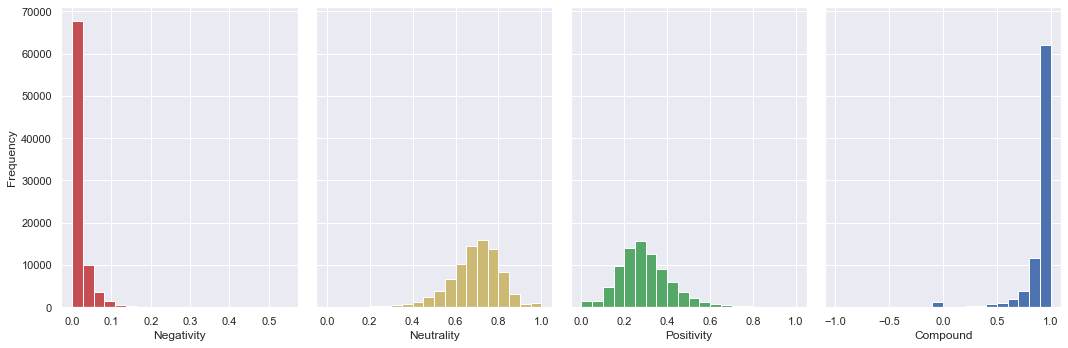

In [16]:
fig, axes = plt.subplots(1,4, figsize = (15,5), sharey = True)

sentiment_df.neg.plot(kind='hist', ax = axes[0], bins = 20, color='r')
sentiment_df.neu.plot(kind='hist', ax = axes[1], bins = 20, color='y')
sentiment_df.pos.plot(kind='hist', ax = axes[2], bins = 20, color='g')
sentiment_df.compound.plot(kind='hist', ax = axes[3], bins = 20)

axes[0].set_xlabel('Negativity')
axes[1].set_xlabel('Neutrality')
axes[2].set_xlabel('Positivity')
axes[3].set_xlabel('Compound')

plt.tight_layout()

Looks like almost all the comments are classified as low negativity. Majority of the comments have a high score of neutrality, while for positivity, most comments are having scores that hover around 0.2 to 0.3. Note that for compound, it is been normalized to -1.0 to 1.0, and the comments generally have a high compound score.

Let's look at the top 5 comments from each category.

In [17]:
list(sentiment_df.nlargest(5,'neg').comments) # isnt 'cant be better' good?

['not a good experience',
 'cant be better',
 'great conditions no complaints',
 'unfortunately i had to cancel i put in wrong dates the host was very understanding',
 'no complaints really the room was as expected had no interactions with the hosts']

In [18]:
list(sentiment_df.nlargest(5,'neu').comments) 
# the 4th comment is not the result from my cleaning! Its was spelt like this in the first place!

['the host canceled this reservation 21 days before arrival this is an automated posting',
 'the blue room rocks',
 'i have come to rely on seans hospitality for my business trips to seattle he is both professional and accommodating and his home is always wellkept',
 'comfycleanquietvery nicethankyu',
 'this was our first airbnb experience the accommodations were spotless and sean and carla made us feel right at home we will be back']

In [19]:
sentiment_df.nlargest(5,'pos').comments  # all the comments are so short

786                               thanks
26634                       great thanks
46451                             thanks
60802          clean and nice super easy
15604    easy comfortable great location
Name: comments, dtype: object

In [20]:
list(sentiment_df.nlargest(1,'compound').comments) # comments are too long lol so top 1

['awesome location about a mile from downtown ballard with tons of cute places to visit  i did brewery and distillery tours and lots of gift shopping for the holidays  lara also lent me a great bike that got me super easily over to the fremont area as well where there is more of the same great restaurants etc  the bike trail burkegilman is just at the bottom of the hill from the house which is in a very nice quiet neighborhood  i did not ride super far on the trail but apparently it is quite long and will take you to tons of great seattle spots  the room itself is more than a room has its own bathroom kitchenette and everything i would need if i wanted a totally private stay  pretty much the entire downstairs to the whole house is all yours  very clean and comfortable with a fun tiki theme  it was raining when i was up there and somewhat cold but i was plenty warm and cozy in the space and lara left out extra blankets just in case  as it was wet outside i did not utilize the patio but 

In [21]:
list(sentiment_df.nlargest(2,'compound').comments)[1] # the second highest comment

'this was our third trip to seattle to visit our son and our first experience with airbnb we definitely hit the jackpot with finding carters house it is beautiful comfortable wonderfully decorated private and has a “million dollar view” the view looks like a painting from every angle the ferry moving silently in and out of the dock confirms that its not a painting but real…even well into the night when you watch the lights of the ferries crisscross across the sound in silence we were lucky to have nice weather for our six days and enjoyed seeing the sunset every evening it was uncharacteristically warm for seattle and carters house is one of the few that has airconditioning the house has everything you could want or need the wellequipped kitchen is a delight to prepare meals in the master bedroom and bathroom are exquisite the rain shower is every bit as wonderful as is described the two sitting rooms are gorgeous and a pleasure to relax in my teen son enjoyed the view he had from the 

In [22]:
list(sentiment_df.nsmallest(1,'compound').comments) # commment with lowest compound score

['melissa replied to our request and approved but by the time we booked it she gave away the apartment to someone else we had no choice but to book another apartment in the same building the price we paid was way too high for the room 129 @ day because there were a lot of issues which we experienced during our stay the coffee pot was left dirty with garbage still in the bins from the previous guests the kitchen faucet was broken and after several emails and 2 days later melissa did come by and get it fixed there were used soap bars and shampoo left in the bathroom which raises hygiene risks my question is why did i pay for cleaning fees if the apartment was dirtythe apartment building was in very poor condition and the apartment had a disgusting smell with no ventilation the apartment decor was poor and furniture was old and uncoordinated although the carpet was vacuumed thats what melissa told us but it was very old and stained the mattress of sofa bed was disgustingly dirty  we only 

In [23]:
list(sentiment_df.nsmallest(2,'compound').comments)[1] # 2nd lowest compound score

'staying at roberts place was a nightmare at 8 am on the first morning we were woken up by very loud hammering and banging occurring literally right outside our window the room was shaking that we thought this was an earthquake we opened the curtain and saw a construction worker on the roof 2 feet from our bedroom window  we immediately called robert who unhelpfully said he had no control over this and that we could cancel our reservation or stay in his basement the first thing i did when i arrived was to make my boyfriend check out his dark basement so it obviously didnt make me feel comfortable to sleep in there it also wouldnt have helped because there was a loud construction machine right in front of where the basement would be the construction occurred again on the next morning robert knew of this construction from his previous guests and made no mention of these major disturbances in the listing or communication with us prior to our arrival he made no effort to contact the worker

Looking at our sentiment analyzer, the first 3 metrics seem to be not doing a good enough job.

From Data meets Media http://datameetsmedia.com/staging/3908/vader-sentiment-analysis-explained/
> Primarily, VADER relies on a dictionary which maps lexical features to emotion intensities called valence scores. The valence score of a text can be obtained by summing up the intensity of each word in the text.

This explains why short comments are generally having high positive scores (look at 'pos'). Short comments do not really give much insights to the host or the apartment, e.g. a 'thanks' does not inform other visitors about what are the things that are good or bad.

However, the compound metric seems to favor long comments and SEEMS to be accurate.

### Wordcloud
We would like to see the common words among the comments that have high compound ratings vs low compound ratings. However, looking at the histogram of compound, it is heavily skewed towards the right. It would not be fair to take the mean and split the data into 50-50 and analyse the common words.

Hence, we have decided to compare the comments with compound scores below 0.5 and above 0.5.

In [24]:
bad_compound_corpus = ' '.join(sentiment_df[sentiment_df.compound < 0.5].comments)
good_compound_corpus = ' '.join(sentiment_df[sentiment_df.compound > 0.5].comments)

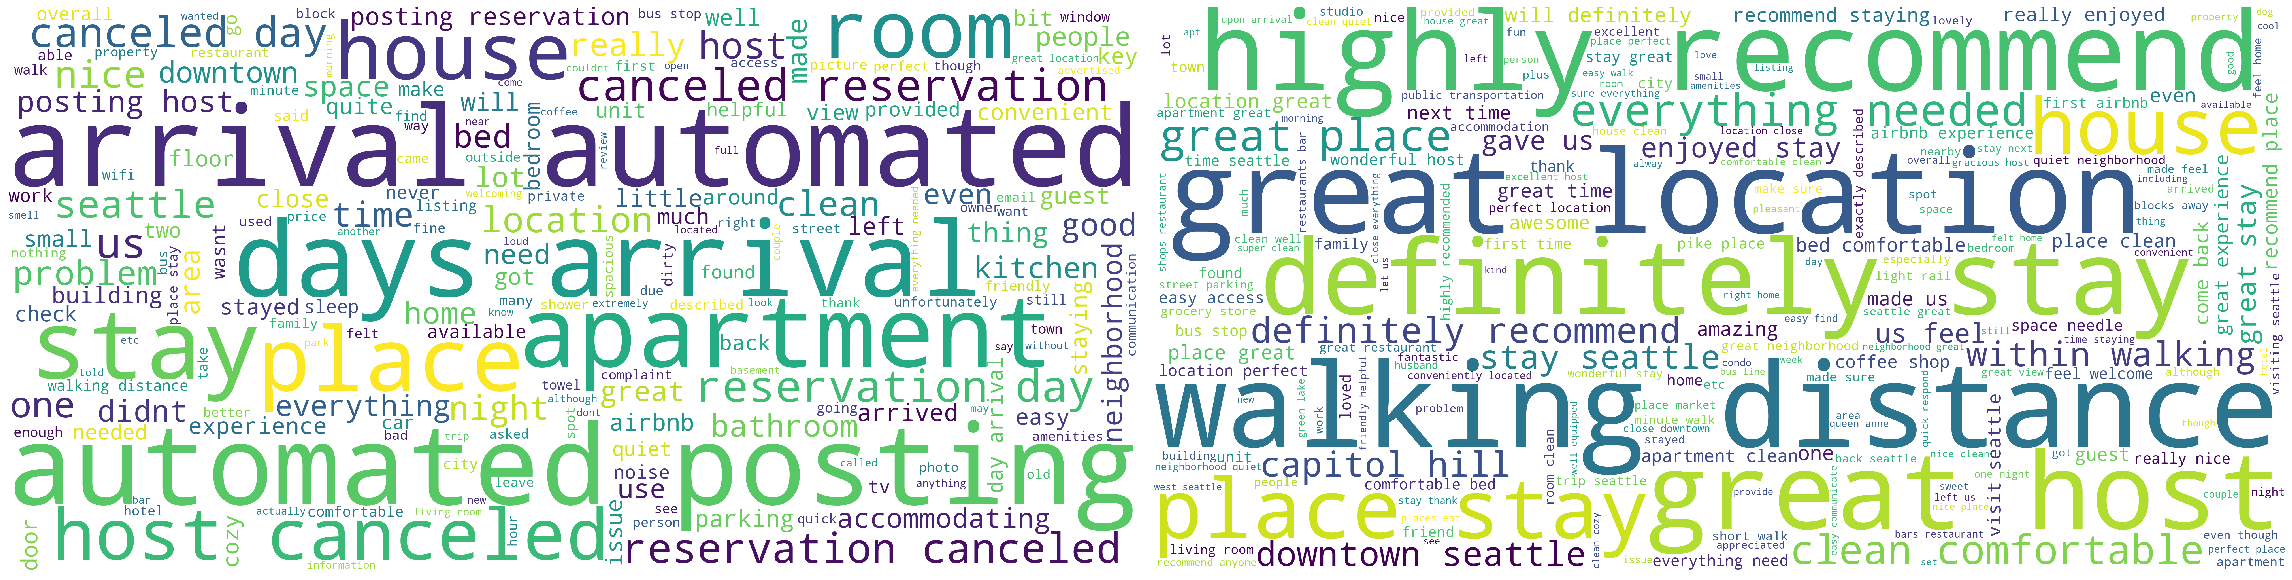

In [25]:
from wordcloud import WordCloud, STOPWORDS
bad_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(bad_compound_corpus)
good_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(good_compound_corpus)

fig, axes = plt.subplots(1,2,figsize = (32,16))

axes[0].imshow(bad_wordcloud)
axes[0].axis('off')

axes[1].imshow(good_wordcloud)
axes[1].axis('off')

plt.tight_layout()

### Conjecture
We can really see the differences between the comments with poor compound score and high compound score. Words like 'cancelled', 'problem' can be evident in `bad_wordcloud`, while `good_wordcloud` shows words like 'recommend' and 'location'.

It is evident that hosts with poor reviews seem to be related to reservations cancellation or are having problems (not sure what yet). Hosts with good reviews seem to be related to location and distance.

There must be more insights to be gathered in other datasets, let's move on to the next dataset!

# Let's take a break

<img src="https://media1.giphy.com/media/4WQdykFn7DhcY/giphy.gif"/>

<img src="https://media.giphy.com/media/WYEWpk4lRPDq0/giphy.gif"/>

<img src="https://i.redd.it/w9sdurjmyoq41.jpg" width=500 height=500 />

# Modeling Ratings using Listings

In [26]:
listings = pd.read_csv('AirBnB/listings.csv')
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

### Cleaning the Listings DataFrame
Looking at amenities column, the amenities that are available by each listing are grouped together in a list. We will separate them out.

In [27]:
listings.amenities = listings.amenities.str.replace(r'[{}""]','').str.replace('/', ',')
amm = ','.join(listings.amenities)
uniques = pd.Series(amm.split(',')).unique()
uniques

array(['TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family', 'Kid Friendly',
       'Washer', 'Dryer', 'Free Parking on Premises', 'Buzzer',
       'Wireless Intercom', 'Smoke Detector', 'Carbon Monoxide Detector',
       'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials',
       'Pets Allowed', 'Pets live on this property', 'Dog(s)', 'Cat(s)',
       'Hot Tub', 'Indoor Fireplace', 'Shampoo', 'Breakfast',
       '24-Hour Check-in', 'Hangers', 'Hair Dryer', 'Iron',
       'Laptop Friendly Workspace', 'Suitable for Events',
       'Elevator in Building', 'Lock on Bedroom Door',
       'Wheelchair Accessible', 'Gym', '', 'Pool', 'Smoking Allowed',
       'Other pet(s)', 'Doorman', 'Washer ', ' Dryer'], dtype=object)

In [28]:
# Remove empty text string and the duplicated washer and dryer
uniques = np.delete(uniques, -7)
uniques = np.delete(uniques, -1) 
uniques = np.delete(uniques, -1) 

In [29]:
# make column names consistent
uniques_amn = pd.Series(uniques).str.strip().str.replace(r'[ -]', '_').str.replace(r'[()]', '').str.lower()
uniques_amn

0                             tv
1                       cable_tv
2                       internet
3              wireless_internet
4               air_conditioning
5                        kitchen
6                        heating
7                         family
8                   kid_friendly
9                         washer
10                         dryer
11      free_parking_on_premises
12                        buzzer
13             wireless_intercom
14                smoke_detector
15      carbon_monoxide_detector
16                 first_aid_kit
17                   safety_card
18             fire_extinguisher
19                    essentials
20                  pets_allowed
21    pets_live_on_this_property
22                          dogs
23                          cats
24                       hot_tub
25              indoor_fireplace
26                       shampoo
27                     breakfast
28              24_hour_check_in
29                       hangers
30        

In [30]:
# matching each unique ammenity to create an array of Trues and False
amm_array = np.array([listings['amenities'].map(lambda amns: unique in amns) for unique in uniques])
amm_array

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [31]:
# assigning each unique amenenity to its column
for i, unique in enumerate(uniques_amn):
    listings[unique] = amm_array[i,:]

listings[uniques_amn]

,tv,cable_tv,internet,wireless_internet,air_conditioning,kitchen,heating,family,kid_friendly,washer,dryer,free_parking_on_premises,buzzer,wireless_intercom,smoke_detector,carbon_monoxide_detector,first_aid_kit,safety_card,fire_extinguisher,essentials,pets_allowed,pets_live_on_this_property,dogs,cats,hot_tub,indoor_fireplace,shampoo,breakfast,24_hour_check_in,hangers,hair_dryer,iron,laptop_friendly_workspace,suitable_for_events,elevator_in_building,lock_on_bedroom_door,wheelchair_accessible,gym,pool,smoking_allowed,other_pets,doorman
0,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,False,True,True,True,True,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3814,True,True,True,True,False,True,True,True,True,False,True,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False
3815,True,True,True,True,False,True,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,True,True,True,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False
3816,True,False,True,True,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False


We will introduce a new feature that shows the number of amenities that each listing has.

In [32]:
# introduce number of amenities
listings['num_amenities'] = amm_array.sum(axis=0)
listings.num_amenities

0       11
1       18
2       22
3       15
4       14
        ..
3813    17
3814    19
3815    22
3816    13
3817    24
Name: num_amenities, Length: 3818, dtype: int32

In [33]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,tv,cable_tv,internet,wireless_internet,air_conditioning,kitchen,heating,family,kid_friendly,washer,dryer,free_parking_on_premises,buzzer,wireless_intercom,smoke_detector,carbon_monoxide_detector,first_aid_kit,safety_card,fire_extinguisher,essentials,pets_allowed,pets_live_on_this_property,dogs,cats,hot_tub,indoor_fireplace,shampoo,breakfast,24_hour_check_in,hangers,hair_dryer,iron,laptop_friendly_workspace,suitable_for_events,elevator_in_building,lock_on_bedroom_door,wheelchair_accessible,gym,pool,smoking_allowed,other_pets,doorman,num_amenities
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,11
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/lef

Looking through each column in `listings.csv`, some columns like `listing_url` and `scape_id` don't seem to relate to ratings scores. So we highlighted which columns to use in our analysis before proceeding on to cleaning.

In [34]:
cols = ['host_neighbourhood', 'neighbourhood_cleansed', 'zipcode',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
        'host_identity_verified', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
        'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
        'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'reviews_per_month',
        'tv', 'cable_tv', 'internet', 'wireless_internet', 'air_conditioning', 'kitchen', 'heating', 'family', 'kid_friendly', 'washer', 'dryer', 'free_parking_on_premises', 
        'buzzer', 'wireless_intercom', 'smoke_detector', 'carbon_monoxide_detector', 'first_aid_kit', 'safety_card', 'fire_extinguisher', 'essentials', 'pets_allowed', 
        'pets_live_on_this_property', 'dogs', 'cats', 'hot_tub', 'indoor_fireplace', 'shampoo', 'breakfast', '24_hour_check_in', 'hangers', 'hair_dryer', 'iron', 'laptop_friendly_workspace', 
        'suitable_for_events', 'elevator_in_building', 'lock_on_bedroom_door', 'wheelchair_accessible', 'gym', 'pool', 'smoking_allowed', 
        'other_pets', 'doorman', 'num_amenities']

In [35]:
df = listings[cols].copy()

In [36]:
total = df.isna().sum()[df.isna().sum() != 0]
percent = total/len(df)
msdata = pd.concat([total, percent], axis = 1, keys = ['total', 'percent']).sort_values('total', ascending = False)
msdata

,total,percent
square_feet,3721,0.974594
monthly_price,2301,0.602672
security_deposit,1952,0.511262
weekly_price,1809,0.473808
cleaning_fee,1030,0.269775
host_acceptance_rate,773,0.202462
review_scores_checkin,658,0.172342
review_scores_accuracy,658,0.172342
review_scores_value,656,0.171818
review_scores_location,655,0.171556


#### Cleaning Approach:
- 97% of the listings do not have `square_feet`, we will drop this feature.
- Some hosts are only subletting their apartment for short term, hence no weekly and monthly price. We will not analyse this for now and focus on its daily price.
- Some do not require security deposit, cleaning fee; its either `NaN` or a value. We will replace the `NaN` with zero to indicate that there is no security deposit/cleaning fee.
- The rest of the columns like `review_scores` are important, so we will drop the `NaN` row-wise.
- Some `host_neighbourhood` are not indicated, will replace them with `''`.
- Need to clean data, eg percentages, price etc, and convert them to their respective types.

In [37]:
df.drop(['square_feet', 'monthly_price', 'weekly_price'], axis=1, inplace=True)
df[['security_deposit', 'cleaning_fee']] = df[['security_deposit', 'cleaning_fee']].fillna(value = '$0')
df.host_neighbourhood = df.host_neighbourhood.fillna(value = '')
df.dropna(inplace = True)

In [38]:
# removes % and converts to float
df.host_response_rate = df.host_response_rate.str.replace('%','').astype('float64')/100
df.host_acceptance_rate = df.host_acceptance_rate.str.replace('%','').astype('float64')/100

# removes '$' and ',' and converts to float
df.price = df.price.str.replace(r'[$,]','').astype('float64')
df.security_deposit = df.security_deposit.str.replace(r'[$,]','').astype('float64')
df.cleaning_fee = df.cleaning_fee.str.replace(r'[$,]','').astype('float64')
df.extra_people = df.extra_people.str.replace(r'[$,]','').astype('float64')

# converts object to boolean
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].apply(lambda x: x == 't')

# convert to categorical
df[['host_neighbourhood', 'neighbourhood_cleansed' ,'host_response_time', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']] = df[['host_neighbourhood', 'neighbourhood_cleansed' ,'host_response_time', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']].astype('category')

# remove unwanted char and convert to int
df.zipcode = df.zipcode.str.replace('99\n', '').astype('int64')

### Statistical Description and Visualization

In [39]:
df.describe()

,zipcode,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,num_amenities
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000
mean,98115.330819,0.953478,0.999623,7.908336,7.908336,47.627948,-122.332675,3.383252,1.247831,1.271596,1.745379,120.816673,138.823840,46.085251,1.708789,11.229347,2.375330,725.018106,29.480951,94.568465,9.638250,9.571105,9.781592,9.806865,9.618634,9.463221,2.328016,15.701245
std,15.814239,0.108628,0.019422,27.582718,27.582718,0.042520,0.031468,1.990981,0.589587,0.853948,1.164106,81.513353,213.168514,49.078408,1.296903,17.412363,19.476871,511.545083,42.021853,6.459404,0.694475,0.765616,0.605803,0.565390,0.618409,0.734375,1.865075,4.905960
min,98101.000000,0.170000,0.000000,1.000000,1.000000,47.507284,-122.417219,1.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000,0.030000,0.000000
25%,98103.000000,0.980000,1.000000,1.000000,1.000000,47.608159,-122.353004,2.000000,1.000000,1.000000,1.000000,70.000000,0.000000,10.000000,1.000000,0.000000,1.000000,32.500000,5.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.900000,12.000000
50%,98112.000000,1.000000,1.000000,2.000000,2.000000,47.622230,-122.329244,3.000000,1.000000,1.000000,1.000000,99.000000,95.000000,35.000000,1.000000,5.000000,2.000000,1125.000000,15.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.870000,15.000000
75%,98121.000000,1.000000,1.000000,3.000000,3.000000,47.661620,-122.310450,4.000000,1.000000,2.000000,2.000000,145.000000,200.000000,65.000000,2.000000,20.000000,2.000000,1125.000000,36.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.275000,19.000000
max,98199.000000,1.000000,1.000000,502.000000,502.000000,47.733358,-122.254189,16.000000,8.000000,7.000000,15.000000,999.000000,2500.000000,300.000000,13.000000,300.000000,1000.000000,1125.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000,32.000000


Inferences:
- Most hosts have high `host_response_rate`, with more than 50% having a score of 1.0
- There may be anomalies, like 8 bathrooms (who needs 8 bathrooms?) and a high $2.5k security deposit.
- Review scores ratings and their subcategories (accuracy, cleanliness, checkin, communication, location, value) seem to be highly skewed to the right.

#### How does  review score ratings varies with location?

From our hypothesis earlier, location seems to be tied to better score ratings. Let's visualize the Airbnb listings on the map

Credits to: [*Easy Steps To Plot Geographic Data on a Map — Python*](https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db)

Map can be downloaded [here](https://www.openstreetmap.org/#map=12/47.6622/-122.3204).

Please run the code cell below if it doesn't show up correctly.

In [40]:
%%HTML 
<iframe width="425" height="350" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" src="https://www.openstreetmap.org/export/embed.html?bbox=-122.6239013671875%2C47.56657124240129%2C-122.18238830566408%2C47.723857258155185&amp;layer=mapnik" style="border: 1px solid black"></iframe><br/><small><a href="https://www.openstreetmap.org/#map=12/47.6453/-122.4031">View Larger Map</a></small>

In [41]:
BBox = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())
airbnbmap = plt.imread('AirBnB/map.png')

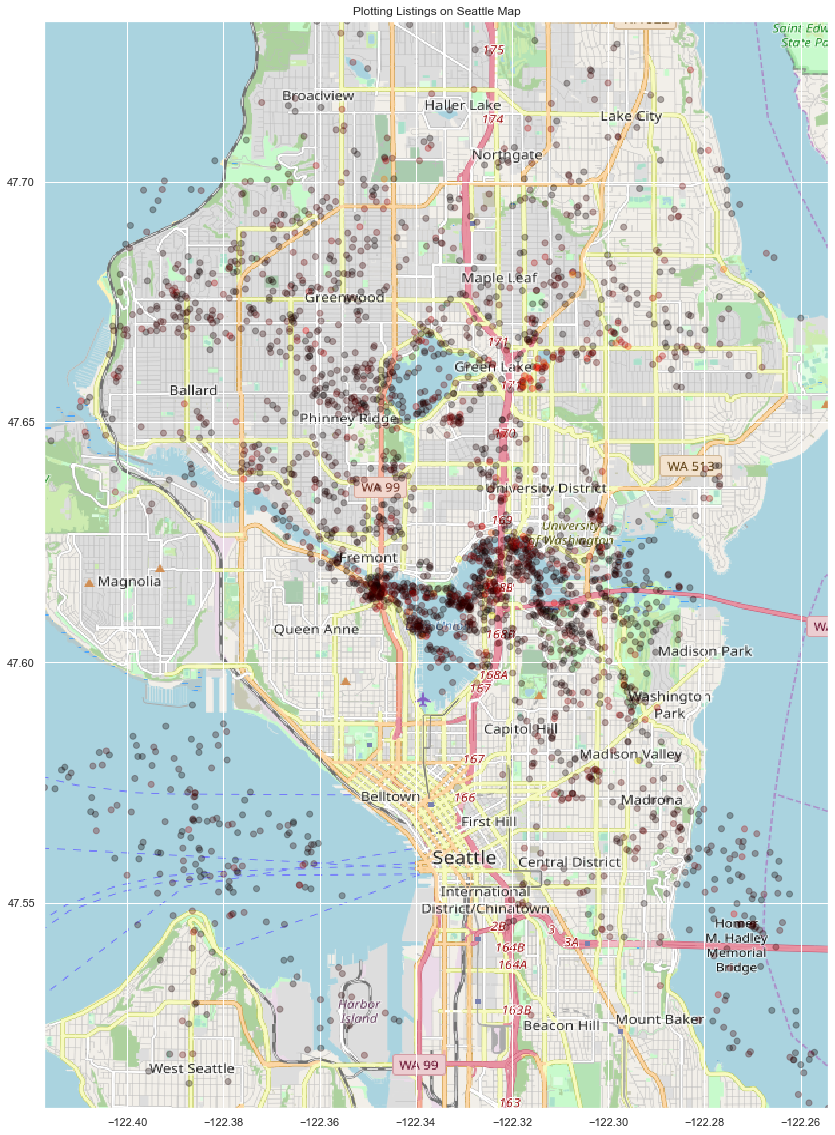

In [42]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df.longitude, df.latitude, alpha = 0.3, c=df.review_scores_rating, cmap = 'hot_r')
ax.set_title('Plotting Listings on Seattle Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(airbnbmap, extent = BBox, aspect= 'equal') # why are there points on the water lol

It seems that a large concentration of the listings can be found around **Lake Union**, a freshwater lake that is popular with tourists. It is also home to two seaplane bases, *Kenmore Air Harbor Seaplane Base* and *Seattle Seaplane*.
<img src="https://petergreenberg.com/wp-content/uploads/2017/09/seattle_lake_union.jpg" width=500 height=500 />
<p><center><strong>Lake Union</strong></center></p>

**Green lake** is another hot spot of listings. The park serves as a natural preserve for hundreds of species of trees and plants, as well as numerous birds and waterfowl.
<img src="https://www.worldfortravel.com/wp-content/uploads/2017/06/Green-Lake-austria-5.jpg" width=500 height=500 />
<p><center><strong>Green Lake</strong></center></p>

However, majority of the `review_scores_rating` are heavily skewed to the right as mentioned earlier. It is hard to see if `longitude` and `latitude` will vary with `review_scores_rating`.

Let us see the distributions of `review_scores_rating` and its other subcategory of score ratings.

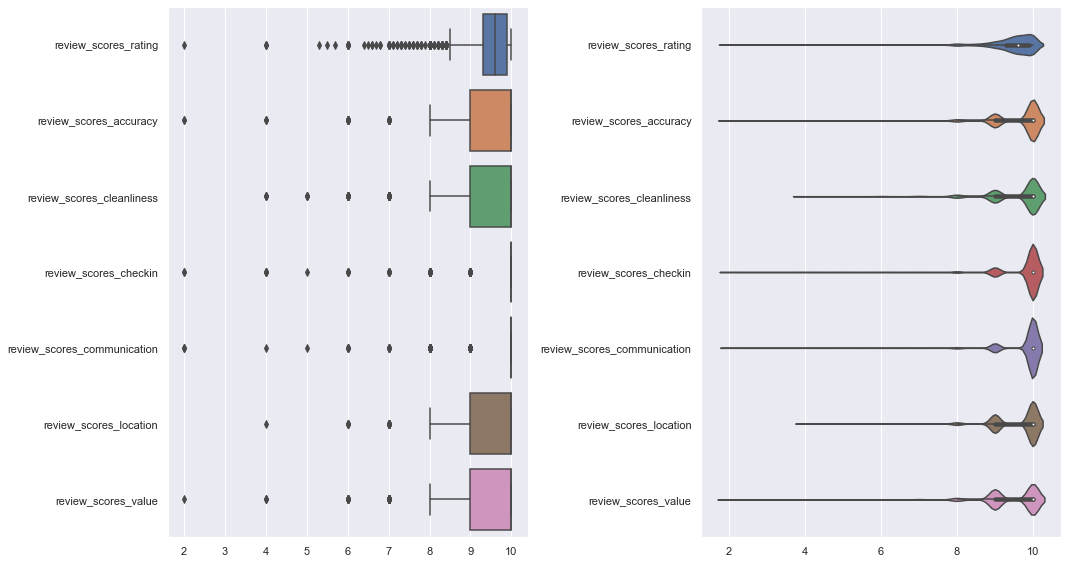

In [43]:
df_boxplot = df.copy()
df_boxplot.review_scores_rating = df_boxplot.review_scores_rating/10 # range from 0 to 100, while other scores range from 0 to 10

rating_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

fig, axe = plt.subplots(1,2, figsize = (15,8))

sns.boxplot(data = df_boxplot[rating_scores], ax = axe[0], orient='h')
sns.violinplot(data = df_boxplot[rating_scores], ax = axe[1], orient='h')
plt.tight_layout()

As shown, the review scores for the dataset is heavily skewed to the right. So it is hard to tell how location will vary with review scores with the given data we have.

### Checking out correlations with review scores
Let's plot a heatmap to see the top 10 features correlate with `review_scores_rating`.

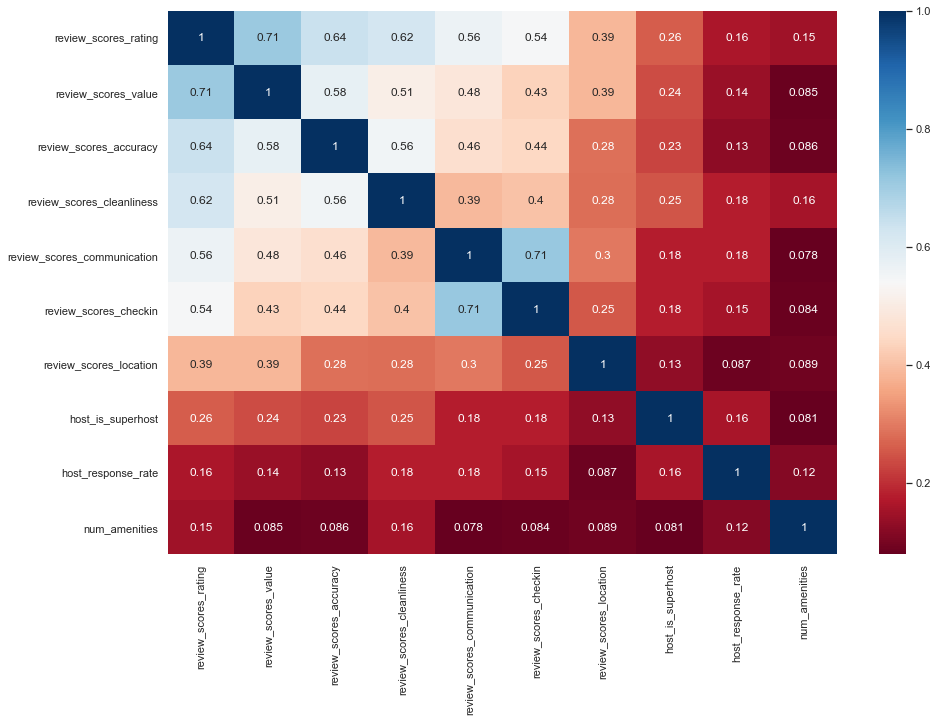

In [44]:
# extract top 10 corr score of review_scores_rating
review_score_corr_top = df.corr().nlargest(10, 'review_scores_rating').review_scores_rating

plt.figure(figsize = (15,10))
sns.heatmap(df.loc[:,review_score_corr_top.index].corr(), annot = True, cmap = "RdBu") # insights: superhost have high review scores

#### Warning! Data Leakage!
From the heatmap, the subcategory of review scores are highly correlated to `review_scores_rating`, which is easy to see why. However, if we were to use the subcategory of review scores as features in any machine learning model, **data leakage** may/will occur.

From [wikipedia](https://en.wikipedia.org/wiki/Leakage_(machine_learning)),
> In statistics and machine learning, leakage (also data leakage, or target leakage) is the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment.

Hence, we must exclude the subcategory of review scores in our analysis. 

One interesting note: `review_scores_location` has the least correlation among the other sub category of review scores. This contradicts our previous hypothesis made from sentiment analysis, that location is highly correlated to better review scores.

Let's try again.

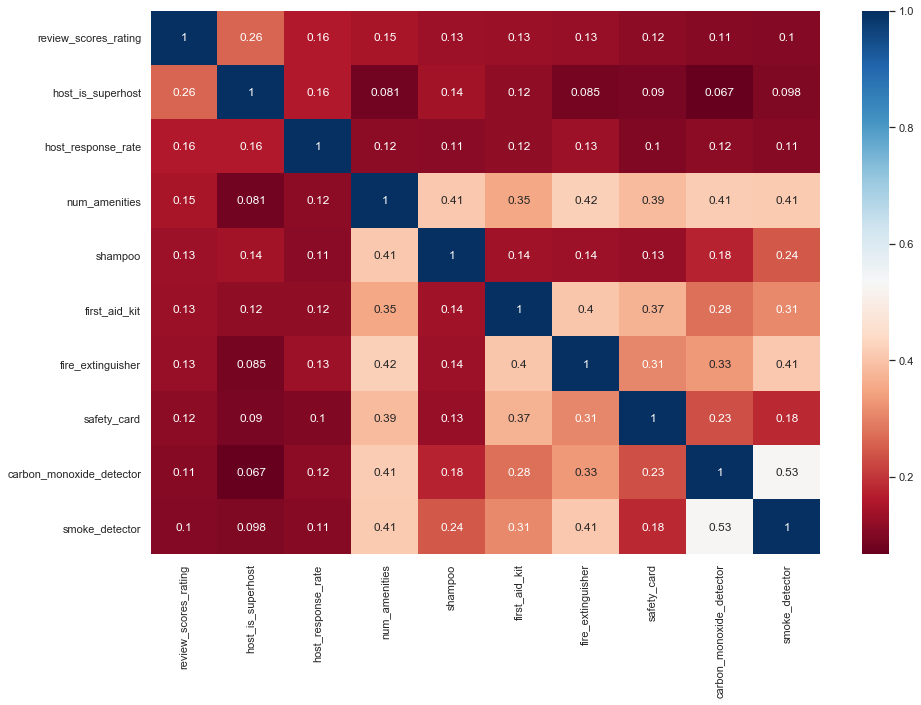

In [45]:
# extract top 10 corr score of review_scores_rating, excluding the subcategories
df_heatmap = df.drop(['review_scores_value', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location','review_scores_communication'], axis = 1).copy()

review_score_corr_top = df_heatmap.corr().nlargest(10, 'review_scores_rating').review_scores_rating

plt.figure(figsize = (15,10))
sns.heatmap(df_heatmap.loc[:,review_score_corr_top.index].corr(), annot = True, cmap = "RdBu") 

There is not a very strong relationship among the other variables. We can see that the top three features with the highest correlation are:

| Feature | Explanation   |
|------|------|
|host_is_superhost| Airbnb superhost programme is a programe that celebrates and rewards Airbnb’s best-rated and most experienced hosts. (we will look more into this)
|host_response_rate| Make sense, but again contradicts with our hypothesis earlier in sentiment analysis, where we thought that host_acceptance_rate will be an more important feature.
|num_amenities| The more the amenities present, the better the experience. Make sense!

### Exploring Superhost 
<img src="https://a0.muscache.com/pictures/9d2c6ec5-6e96-4c26-b9d7-dda29cb76e49.jpg" width=20 height=20 />
<p><center>Superhost Badge</center></p>

Here are the [*Superhost requirements*](https://www.airbnb.com.sg/help/article/829/how-do-i-become-a-superhost?_set_bev_on_new_domain=1582964662_Y2RlNzkxZjExZDg5):
> Completed at least 10 trips OR completed 3 reservations that total at least 100 nights  
> Maintained a 90% response rate or higher  
> Maintained a 1% percent cancellation rate (1 cancellation per 100 reservations) or lower, with exceptions made for those that fall under our Extenuating Circumstances policy  
> Maintained a 4.8 overall rating (this rating looks at the past 365 days of reviews, based on the date the guest left a review, not the date the guest checked out)

And in return, Superhost receive the following benefits:
> Earn extra money: Superhosts often benefit from a significant increase in earnings. More visibility and trust from guests can mean more money for you.  
> Attract more guests: You’ll be featured to guests in search results, emails and more. There’s even a search filter to find Superhost listings. We’ll also add a Superhost badge on your profile and listing so you can really stand out.  
> Access exclusive rewards: You’ll get an extra 20% on top of the usual bonus when you refer new hosts. And after each year as a Superhost, you’ll get a $100 travel coupon.  

Let's look at `host_is_superhost` vs `host_response_rate`, `cancellation_policy` and `review_scores_rating`.

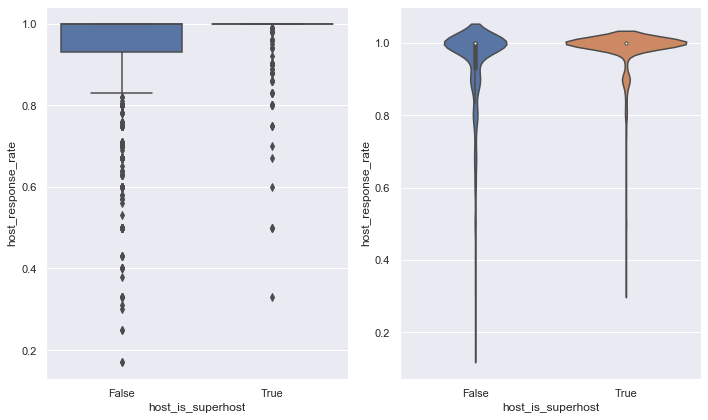

In [46]:
fig, axe = plt.subplots(1,2, figsize = (10,6))

sns.boxplot(x='host_is_superhost', y='host_response_rate', data = df, ax = axe[0])
sns.violinplot(x='host_is_superhost', y='host_response_rate', data = df, ax = axe[1])

plt.tight_layout()

There is a larger (albeit small) proportion of non-superhosts that do not have a 100% response rate, while majority of superhosts have a perfect response rate.

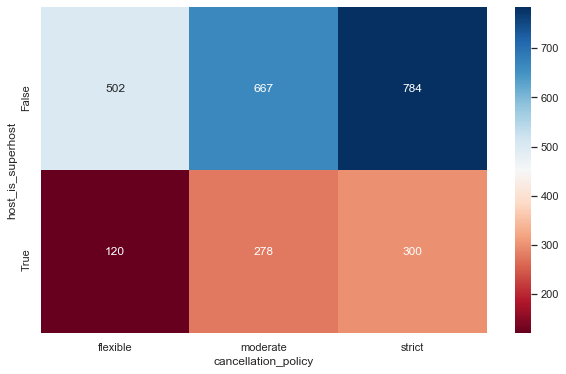

In [47]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df.groupby(['host_is_superhost','cancellation_policy']).size().unstack(), annot = True, cmap = "RdBu", fmt=".0f") 

The heatmap shows that a larger percentage of superhost (82.7%) have a moderate to strict cancellation policy compared to non-superhost (74.2%).

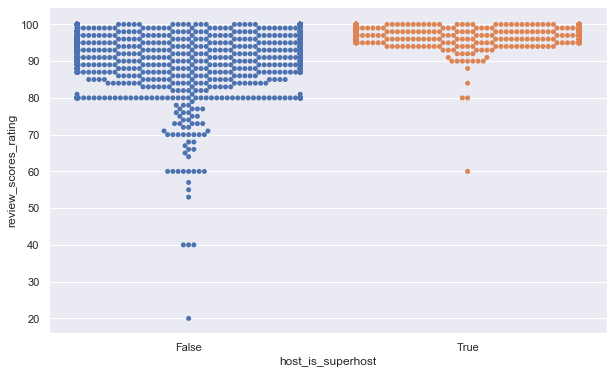

In [48]:
fig = plt.figure(figsize = (10,6))
sns.swarmplot(x='host_is_superhost', y='review_scores_rating', data = df)

There seems to be a clear distinction between superhost and non-superhost. A larger proportion of superhost tend to have a better `review_scores_rating`.

Lastly, let's plot `review_scores_rating` against `num_amenities`.

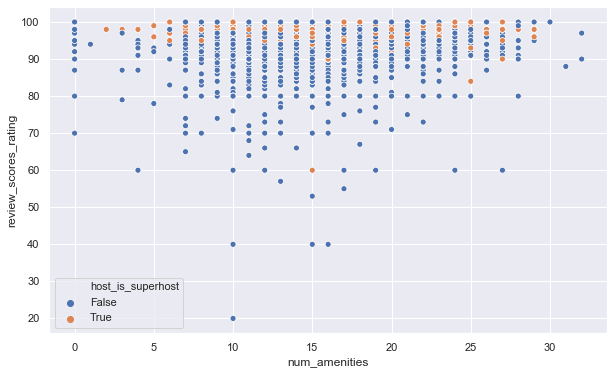

In [49]:
fig = plt.figure(figsize = (10,6))
sns.scatterplot('num_amenities', 'review_scores_rating', hue='host_is_superhost', data=df)

Not really a trend to see here. 
- There are hosts that manage to get a perfect review score even with little amenities. Perhaps the amenities are present on site but not listed on their Airbnb page?
- There are hosts with many amenities but didn't get a good review score. Maybe there are other factors that may have influenced the visitors' experience and hence the ratings?

To sum up, based from the visualizations, the following may be important features to predicting ratings:
- `host_is_superhost`
- `host_response_rate`
- `num_amenities`
- `cancellation_policy` (It is a requirement of superhost so maybe it is also an important feature.)

### Machine Learning

We will model `review_scores_rating` using a few machine learning models. Our objective is to see whether the feature importance used in the model is similar to our hypothesis earlier from visualization.

We will use **One Hot Encoding** to transform the columns with category data type into ones and zeroes. An illustrated example is shown below:

<img src="http://brettromero.com/wp-content/uploads/2016/03/OHE-Image.png" width=700 height=700 />

Then we will split our data into train data and test data, with a test size of 0.3.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model_df = pd.get_dummies(df_heatmap) # without the subcategory of review scores

X = model_df.drop('review_scores_rating', axis=1)
y = model_df.review_scores_rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

#### Linear Regression
**Linear Regression** is a simple machine learning model seeks to minimize its cost function to obtain the optimum parameters.

Hypothesis: $h_{\theta}(x) = \theta_{0} + \theta_{1}x + ...\theta_{n}x_{n}=\theta^{T}x$,  where $\theta$ is the parameter matrix that we want to obtain

Cost Function: $$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)^2$$

R^2 train = 0.3195459720978834
R^2 test = 0.01550116204635632
MSE = 45.28561029646634


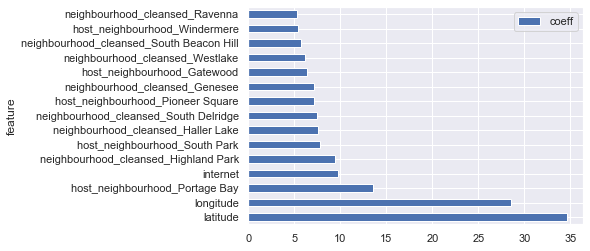

In [51]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f'R^2 train = {linreg.score(X_train, y_train)}\nR^2 test = {linreg.score(X_test, y_test)}\nMSE = {mean_squared_error(y_test, linreg.predict(X_test))}')
pd.DataFrame({'feature': X_train.columns, 'coeff': linreg.coef_}).nlargest(15, 'coeff').plot(x='feature', y='coeff', kind='barh')

From **linear regression** model, location seems to be a key feature. Majority of the features that have a high coefficient ($\theta_i$) are `latitude`, `longitude` and categories of neighbourhoods. Having a high coefficient means that it has a bigger weightage on predicted ratings.

This model has a low $R^2$ value and a high MSE error, so it may not be the most accurate. The test score is also relatively poorer than the train score, which hints over-fitting

Let's try other linear models to see if we can get a better $R^2$ as well as prevent over-fitting.

#### Ridge Regression

Credits to: [*Ridge and Lasso Regression: L1 and L2 Regularization*](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

The difference between the **linear regression** and **ridge regression** is that **ridge regression** requires a term $\lambda$ that penalizes the square of the magnitude of the coefficients.

Cost Function: $$J(\theta) = \frac{1}{2m}\left[\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)^2 + \lambda\sum_{j=1}^{n}\theta_j^2\right]$$

The point of using a **ridge regression** is to helps to reduce the model complexity and multi-collinearity by shrinking the coefficients. This is done by adding a $\lambda$ at the back of the cost function.

A low value of $\lambda$ resembles the linear regression model. For now, we will set $\lambda = 0.1$.

R^2 train = 0.31838248173118433
R^2 test = 0.03209832324975548
MSE = 44.5221634082536


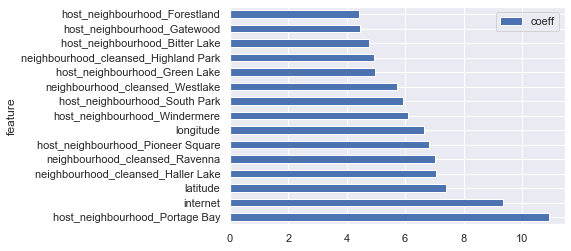

In [52]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print(f'R^2 train = {ridge.score(X_train, y_train)}\nR^2 test = {ridge.score(X_test, y_test)}\nMSE = {mean_squared_error(y_test, ridge.predict(X_test))}')
pd.DataFrame({'feature': X_train.columns, 'coeff': ridge.coef_}).nlargest(15, 'coeff').plot(x='feature', y='coeff', kind='barh')

Location seems to be the key feature here again, with categories of neighbourhoods having a high coefficient.

The ridge regression model doesn't seem to perform very well too. It still has a low $R^2$ and high MSE. The issue of over-fitting is still present.

#### Lasso Regression

The idea of using **lasso regression** is the same as using **ridge regression**. The only difference is that it is penalizing the magnitudes of the coefficients.

Cost Function: 
$$J(\theta) = \frac{1}{2m}\left[\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)^2 + \lambda\sum_{j=1}^{n}|\theta_j|\right]$$

This type of regression can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. This helps to reduce over-fitting and also feature selection!

Likewise, we will set $\lambda = 0.1$.

R^2 train = 0.1741230459328018
R^2 test = 0.12876514924344362
MSE = 40.075620617359405


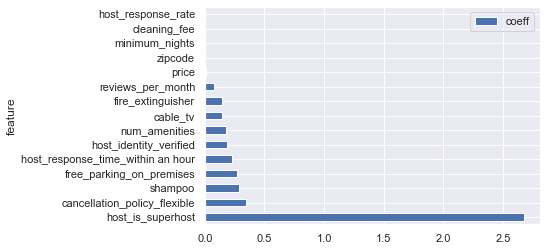

In [53]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print(f'R^2 train = {lasso.score(X_train, y_train)}\nR^2 test = {lasso.score(X_test, y_test)}\nMSE = {mean_squared_error(y_test, lasso.predict(X_test))}')
pd.DataFrame({'feature': X_train.columns, 'coeff': lasso.coef_}).nlargest(15, 'coeff').plot(x='feature', y='coeff', kind='barh')

The features here somewhat correspond to what we hypothesize back then, where the key features towards high rating scores are superhost, cancellation policy and number of amenities. 

Moreover, lasso model has the best $R^2$ test score and the lowest MSE score. Even the test score is relatively similar to the train score compared to the previous linear models.

But to begin with, the dataset given may not be linear to begin with, which explains the low $R^2$ and high MSE value.

#### Random Forest

Since the data does not seem to be linear in nature, let's try random forest.

Accuracy train = 0.2846271299175559
Accuracy test = 0.10758546495796939
MSE = 41.04985734753962


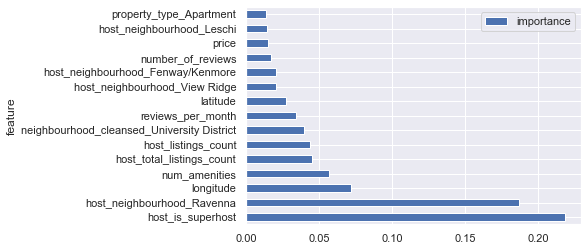

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_clf = RandomForestRegressor(max_depth=4)
forest_clf.fit(X_train, y_train)
print(f'Accuracy train = {forest_clf.score(X_train, y_train)}\nAccuracy test = {forest_clf.score(X_test, y_test)}\nMSE = {mean_squared_error(y_test, forest_clf.predict(X_test))}')
pd.DataFrame({'feature': X_train.columns, 'importance': forest_clf.feature_importances_}).nlargest(15, 'importance').plot(x='feature', y='importance', kind='barh')

The same few features (superhost, number of amenities, location) come up again. 

Neighbourhood Ravenna shows up twice (previously from ridge regression). It could be that Ravenna is located near Green Lake, hence Neighbourhood Ravenna is an important feature in modeling rating scores?

The model does not have the best accuracy though.

Please run the code cell below if it doesn't show up correctly.

In [55]:
%%HTML 
<<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d26689.984929283295!2d-122.32057199362325!3d47.67475422350216!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x54901479006afd25%3A0xd6e9b9acc37ccba2!2sRavenna%2C%20Seattle%2C%20WA%2C%20USA!5e0!3m2!1sen!2ssg!4v1586007182471!5m2!1sen!2ssg" width="600" height="450" frameborder="0" style="border:0;" allowfullscreen="" aria-hidden="false" tabindex="0"></iframe>

# Discussion
Despite our best attempts, the predictive models that we came up with did not have very good accuracy. Here are some ways that we think may help improve the model:
- `df.describe()` has shown that there may be presence of anomalies in the data. Perhaps we can identify these anomalies via $1.5\times iqr$ or using anomaly detection and exclude them from the data.
- Introduce more features. We have seen how attractions (Lake Union and Green Lake) may have an effect on the model. 
 - One example would be to gather the locations (longitude and latitude) of attractions in the area, then calculate the euclidean distance between nearest attraction and the accommodation.
 - This will give us a measure of closeness to nearby tourist attractions.
- Methods like **feature scaling** or **mean normalization** may help with the modeling.
- **Feature transformation techniques** like logarithm or square root transformation (more can be found [here](https://datascience.stackexchange.com/questions/21650/feature-transformation-on-input-data)) helps to shape the data to normality.
 - Remember that our target variable `review_scores_rating` is highly skewed to the right.
 - One approach would be to examine `df.skew()` to check for the skewness of the data, then perform `np.log1p` transformation.
- For **ridge and lasso regression**, recall that the regularization parameter, $\lambda$ has to be defined beforehand. 
 - We can use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to optimize $\lambda$ from 0.01 to 10 and plot out the $R^2$ and MSE against $\lambda$. Then use the best $\lambda$ that optimizes $R^2$ and MSE.
 
### Final Notes:
Take note that if we were to employ the following techniques, we perform feature normalization over the training data and testing data separately, as shown [here](https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data). This helps prevent any data leakage (as seen earlier) from influencing the final results of our machine learning models.

# Conclusion
The takeaway from this project helps us to identify the important features that can help to model rating scores. To sum up, if you are looking for Airbnb accommodation in Seattle, you may want to look out for superhosts, the number of amenities listed, the host cancellation policy and location. Even though our models' predictive accuracy is poor, it points to many insights about Seattle's AirBnB market.